# Norms and Eigendecomposition

In [2]:
import numpy as np
import sys

In [3]:
from numpy import linalg

In [5]:
# define an array
A = np.arange(9) - 3
A

array([-3, -2, -1,  0,  1,  2,  3,  4,  5])

In [7]:
B = A.reshape((3,3))
B

array([[-3, -2, -1],
       [ 0,  1,  2],
       [ 3,  4,  5]])

In [8]:
# Euclidean L2 norm
print(linalg.norm(A))
print(linalg.norm(B))


8.306623862918075
8.306623862918075


In [10]:
# The Frogenius norm is the L2 norm for a matrix
print(linalg.norm(B,'fro'))
      

8.306623862918075


In [11]:
# The max norm (P =  infinity )
print(linalg.norm(B,np.inf))
print(linalg.norm(A,np.inf))


12.0
5.0


In [12]:
# vector normalization to produce a unit vector
norm = linalg.norm(A)
A_unit = A / norm
A_unit

array([-0.36115756, -0.24077171, -0.12038585,  0.        ,  0.12038585,
        0.24077171,  0.36115756,  0.48154341,  0.60192927])

In [15]:
# The magnitude of a unit vector is equal to 1
np.linalg.norm(A_unit)

np.float64(1.0)

# Eigendecomposition

In [16]:
# find the eigenvalues and eigenvectors for a simple square matrix
A = np.diag(np.arange(1,4))
A

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [17]:
eigenvalues , eigenvectors = np.linalg.eig(A)

In [18]:
# return the eigenvalues for the matrix
eigenvalues


array([1., 2., 3.])

In [19]:
# return the eigenvectors for the matrix
eigenvectors

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [20]:
# The eigenvalue w[i] corresponds to the eigenvector v[:,i]
print(f' Eigenvalue: {eigenvalues[1]}')
print(f' Eigenvector: {eigenvectors[:,1]}')

 Eigenvalue: 2.0
 Eigenvector: [0. 1. 0.]


In [23]:
# Check to see if this is correct
# verify eigendecomposition
matrix = np.matmul(np.diag(eigenvalues),linalg.inv(eigenvectors))
output = np.matmul(eigenvectors,matrix).astype(int)
output

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [25]:
# import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


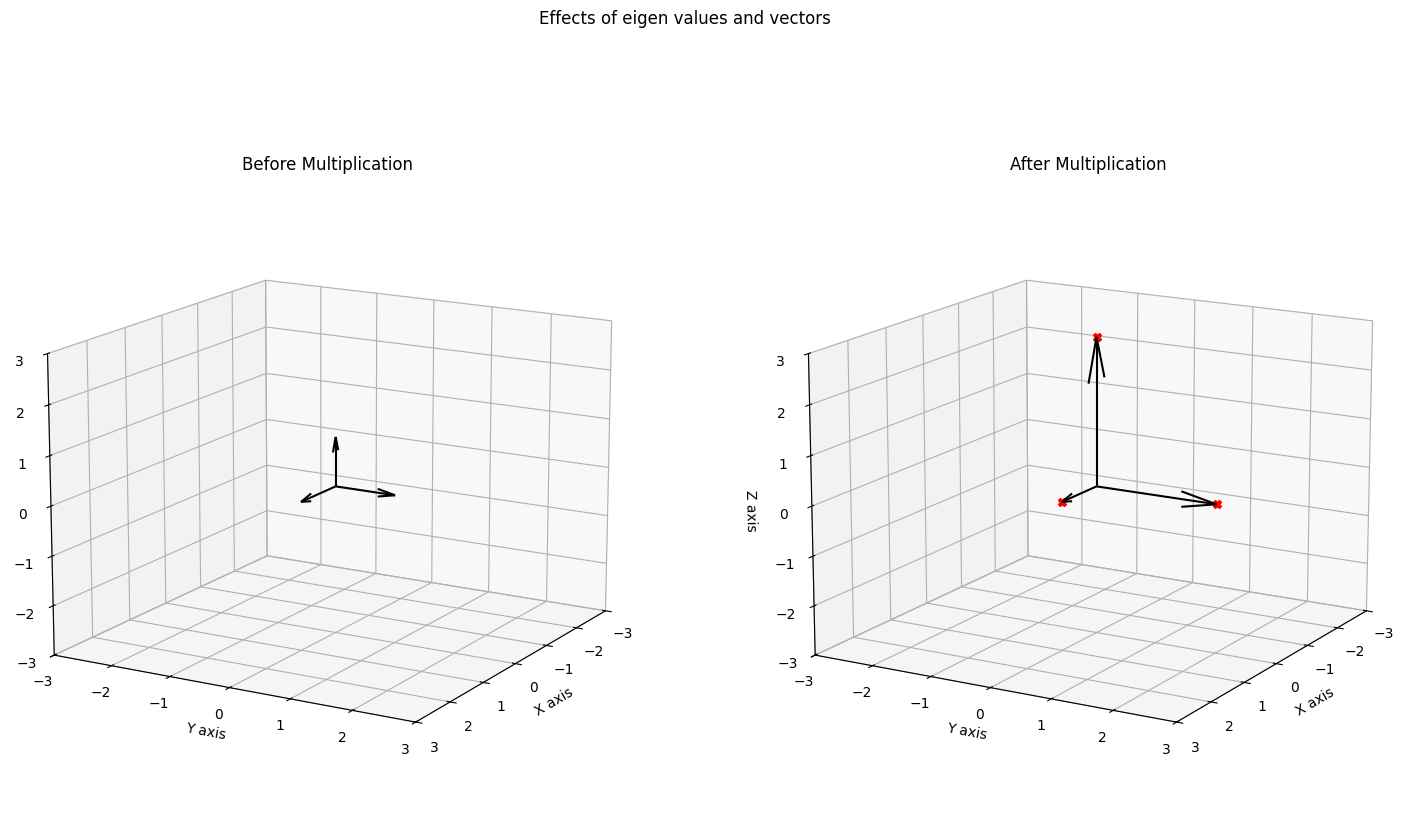

In [31]:
# Plot the eigenvectors
origin = [0,0,0]
fig = plt.figure(figsize=(18,10))
fig.suptitle('Effects of eigen values and vectors')
axl = fig.add_subplot(121, projection='3d')
axl.quiver(origin,origin, origin, eigenvectors[0,:],eigenvectors[1,:],eigenvectors[2,:], color = 'k')
axl.set_xlim([-3,3])
axl.set_ylim([-3,3])
axl.set_zlim([-3,3])
axl.set_xlabel('X axis')
axl.set_ylabel('Y axis')
axl.set_zlabel('Z axis')
axl.view_init(15,30)
axl.set_title('Before Multiplication')
# multiply original matrix by eigenvectors
new_eig = np.matmul(A,eigenvectors)
axl2 = plt.subplot(122, projection='3d')
axl2.quiver(origin,origin, origin, new_eig[0,:],new_eig[1,:],new_eig[2,:], color = 'k')
axl2.plot((eigenvalues[0]*eigenvectors[0]),(eigenvalues[1]*eigenvectors[1]),(eigenvalues[2]*eigenvectors[2]),'rX')

axl2.set_xlim([-3,3])
axl2.set_ylim([-3,3])
axl2.set_zlim([-3,3])
axl2.set_xlabel('X axis')
axl2.set_ylabel('Y axis')
axl2.set_zlabel('Z axis')
axl2.view_init(15,30)
axl2.set_title('After Multiplication')




plt.show()